Dataset taken from Kaggle <br>
https://www.kaggle.com/datasets/maajdl/yeh-concret-data

<img src="../ML_steps.png">

# Import Libraries

In [1]:
# To read the data and form dataframe
import pandas as pd

# Train Test Split
from sklearn.model_selection import train_test_split

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model evaluation
from sklearn.metrics import mean_squared_error, explained_variance_score

# Read the data

In [2]:
raw_df = pd.read_csv('../database/regression_Concrete_Data_Yeh.csv')

In [3]:
raw_df.head(2)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [4]:
# Check shape of the dataset
raw_df.shape

(1030, 9)

# Clean Data
---
### Check for missing values and duplicates

In [5]:
# remove duplicates
raw_df.drop_duplicates(inplace=True)

# check for missing values
print(raw_df.isna().sum())

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


---
### Check for outliers

<AxesSubplot:>

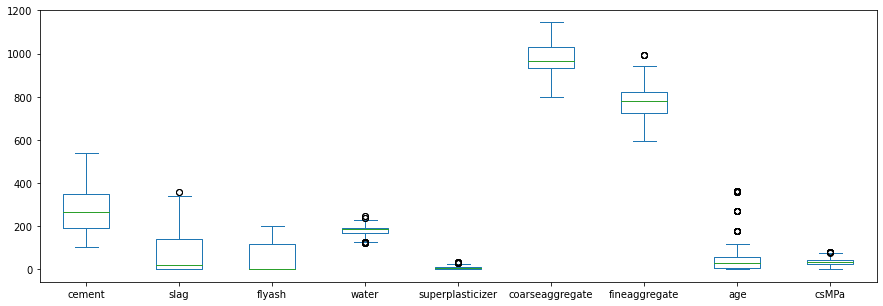

In [6]:
# Check outliers via boxplot
raw_df.plot(kind='box', figsize=(15, 5))

In [7]:
# let us create a function where we replace the outlier values with min max values for their reapective feature

# Form permissible min max values based on Inter Quartile Range (IQR)
q1 = raw_df.quantile(0.25)
q3 = raw_df.quantile(0.75)
iqr = q3 - q1
min_val = q1 - 1.5 * iqr
max_val = q3 + 1.5 * iqr


def process_outlier(value: float, min_val: float, max_val: float) -> float:
    """
    Info: returns the permissible value based on min max values.
    
    Arguments:
        value (float): input value to check
        min_val (float): minimum permissible value
        max_val (float): maximum permissible value
    
    Returns:
        float: value if the value lies between minimum and maximum value else minimum or maximum value.
    """
    if value < min_val:
        return min_val
    elif value > max_val:
        return max_val
    else:
        return value

In [8]:
# Form list of columns where we see outliers
outlier_cols = ["slag", "water", "superplasticizer", "fineaggregate", "age", "csMPa"]

In [9]:
# Loop over the columns to process their outliers
for col_name in outlier_cols:
    raw_df[col_name] = raw_df[col_name].apply(lambda x: process_outlier(x,min_val[col_name], max_val[col_name]))

<AxesSubplot:>

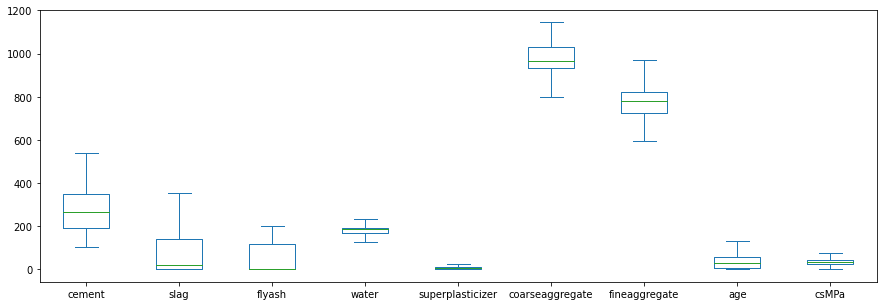

In [10]:
# Check outliers via boxplot
raw_df.plot(kind='box', figsize=(15, 5))

---
### Check correlations

In [11]:
raw_df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,0.488690
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.102440
flyash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.079685
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,-0.271381
superplasticizer,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.342983
coarseaggregate,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.145794
fineaggregate,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.188509
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.476726
csMPa,0.488690,0.102440,-0.079685,-0.271381,0.342983,-0.145794,-0.188509,0.476726,1.000000


# Form *features* and *target*
Features are the independent variables<br>
Target is the dependent variable

In [12]:
# Form features and target
features = raw_df[raw_df.columns.tolist()[:-1]]
target = raw_df[raw_df.columns.tolist()[-1]]

# Train Test Split

In [13]:
# Split the data using train test split with test_size of 20%
train_x, test_x, train_y, test_y = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Check the shape of the train and test split
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(804, 8) (201, 8) (804,) (201,)


# Normalize Data

In [14]:
scaler = StandardScaler()

processed_train_x = scaler.fit_transform(train_x)
processed_test_x = scaler.transform(test_x)

# Train Model

In [15]:
# Form model objects. For demo purpose, we will consider Linear Regression, Random Forest and Support Vector

model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_sv = SVR()

In [16]:
# Fit the model

model_lr.fit(processed_train_x, train_y)
model_rf.fit(processed_train_x, train_y)
model_sv.fit(processed_train_x, train_y)

SVR()

In [17]:
# Make predictions on test data

pred_lr = model_lr.predict(processed_test_x)
pred_rf = model_rf.predict(processed_test_x)
pred_sv = model_sv.predict(processed_test_x)

# Model Evaluation

In [18]:
print(f"1. Linear Regression:\n    mean_squared_error: {mean_squared_error(test_y, pred_lr)}\n    explained_variance_score: {explained_variance_score(test_y, pred_lr)}\n")

print(f"2. Random Forest:\n    mean_squared_error: {mean_squared_error(test_y, pred_rf)}\n    explained_variance_score: {explained_variance_score(test_y, pred_rf)}\n")

print(f"3. Support Vector:\n    mean_squared_error: {mean_squared_error(test_y, pred_sv)}\n    explained_variance_score: {explained_variance_score(test_y, pred_sv)}\n")

1. Linear Regression:
    mean_squared_error: 87.9133374841385
    explained_variance_score: 0.7010472960837949

2. Random Forest:
    mean_squared_error: 25.006845830732853
    explained_variance_score: 0.9156866038466035

3. Support Vector:
    mean_squared_error: 98.35380608020886
    explained_variance_score: 0.6697118240822098

